In [2]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle


file_list = []
class_list = []

DATADIR = "/content/drive/MyDrive/birds/train" 

# All the categories you want your neural network to detect
CATEGORIES = ["RED FODY", "SAND MARTIN", "SHOEBILL", "STEAMER DUCK", "STRIPPED SWALLOW", "TAKAHE", "VIOLET GREEN SWALLOW", "WHITE BROWED CRAKE", "WILSONS BIRD OF PARADISE", "YELLOW HEADED BLACKBIRD"]

# The size of the images that your neural network will use
IMG_SIZE = 224

# Checking or all images in the data folder
for category in CATEGORIES :
	path = os.path.join(DATADIR, category)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

training_data = []

def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				training_data.append([new_array, class_num])
			except Exception as e:
				pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
	X.append(features)
	y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [3]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt



# normalizing data (a pixel goes from 0 to 255)
X = X/255.0
y = np.array(y)

In [ ]:
X.shape

(1493, 224, 224, 1)

In [4]:
import keras
from tensorflow.keras import layers, Model, optimizers

In [5]:
model = Sequential(
    [  # Faltungsschichten -> Merkmale erkennen und extrahieren
      Conv2D(256, (3,3), activation='relu'),
      MaxPooling2D(pool_size=2),
      tf.keras.layers.BatchNormalization(),    

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),    

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),

    # Notwendiger Schritt für die Dense-layer (2D -> 1D)
    Flatten(),
    
    # Overfitting vermeiden
    Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    
    # Vollvermaschte Schicht -> Klassifizierung
    Dense(10, activation='softmax')
])



# Hilft dabei Unordnung aus alten Modellen und Schichten zu entfernen, 
#   besonders wenn nur wenig RAM verfügbar ist.
#keras.backend.clear_session()
#model.summary()

In [6]:
import time

In [ ]:
# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
start_time = time.time()
history = model.fit(X, y, batch_size=32, epochs=3, validation_split=0.1)
print("  %s seconds " % (time.time() - start_time))
model_save_name = "model/Model_" + str(time.strftime("%Y-%m-%d_%H:%M:%S")) + ".h5"
model.save(model_save_name)

Epoch 1/3
42/42 [==============================] - 864s 20s/step - loss: 2.3349 - accuracy: 0.2681 - val_loss: 2.3715 - val_accuracy: 0.1267
Epoch 2/3
42/42 [==============================] - 874s 21s/step - loss: 1.5887 - accuracy: 0.4721 - val_loss: 2.5919 - val_accuracy: 0.1467
Epoch 3/3
42/42 [==============================] - 875s 21s/step - loss: 1.2677 - accuracy: 0.5808 - val_loss: 2.7398 - val_accuracy: 0.1400
  2663.6940348148346 seconds 


In [7]:
# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
start_time = time.time()
history = model.fit(X, y, batch_size=32, epochs=7, validation_split=0.1)
print("  %s seconds " % (time.time() - start_time))
model_save_name = "model/Model_" + str(time.strftime("%Y-%m-%d_%H:%M:%S")) + ".h5"
model.save(model_save_name)

Epoch 1/7
42/42 [==============================] - 880s 21s/step - loss: 2.2852 - accuracy: 0.2829 - val_loss: 2.2728 - val_accuracy: 0.1600
Epoch 2/7
42/42 [==============================] - 874s 21s/step - loss: 1.5447 - accuracy: 0.4840 - val_loss: 2.3922 - val_accuracy: 0.1600
Epoch 3/7
42/42 [==============================] - 882s 21s/step - loss: 1.2748 - accuracy: 0.5659 - val_loss: 2.9426 - val_accuracy: 0.1000
Epoch 4/7
42/42 [==============================] - 879s 21s/step - loss: 0.9856 - accuracy: 0.6642 - val_loss: 2.9009 - val_accuracy: 0.0933
Epoch 5/7
42/42 [==============================] - 899s 21s/step - loss: 0.8081 - accuracy: 0.7200 - val_loss: 3.4345 - val_accuracy: 0.0733
Epoch 6/7
42/42 [==============================] - 890s 21s/step - loss: 0.6476 - accuracy: 0.7893 - val_loss: 4.3244 - val_accuracy: 0.1267
Epoch 7/7
42/42 [==============================] - 895s 21s/step - loss: 0.5385 - accuracy: 0.8295 - val_loss: 3.2044 - val_accuracy: 0.2133
  6203.578400

--- 0.24973225593566895 seconds ---
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Real 
RED FODY
Prediction 
SHOEBILL


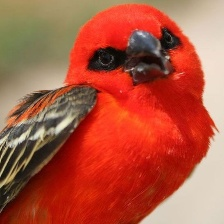

--- 0.24090027809143066 seconds ---
[0.0, 0.0, 4.3723432e-24, 0.0, 0.0, 0.0, 3.1282116e-29, 0.0, 1.0, 0.0]
Real 
SAND MARTIN
Prediction 
WILSONS BIRD OF PARADISE


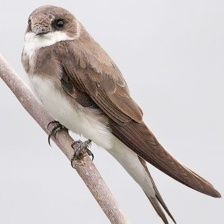

--- 0.23108124732971191 seconds ---
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.37212e-08, 0.0]
Real 
SHOEBILL
Prediction 
SHOEBILL


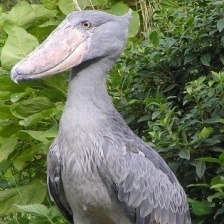

--- 0.2430875301361084 seconds ---
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.9913605e-38, 0.0]
Real 
STEAMER DUCK
Prediction 
SHOEBILL


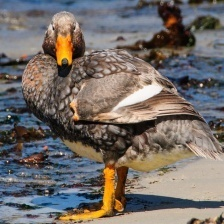

--- 0.25744009017944336 seconds ---
[0.0, 0.0, 1.01554344e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
Real 
STRIPPED SWALLOW
Prediction 
WILSONS BIRD OF PARADISE


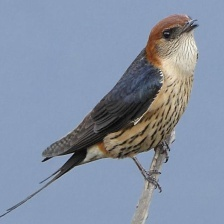

--- 0.24003028869628906 seconds ---
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.4981309e-27, 0.0, 0.0, 0.0]
Real 
TAKAHE
Prediction 
SHOEBILL


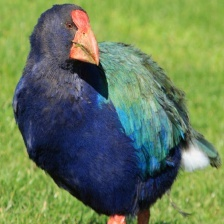

--- 0.23606276512145996 seconds ---
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.16518145e-32, 0.0, 1.0163965e-27, 0.0]
Real 
VIOLET GREEN SWALLOW
Prediction 
SHOEBILL


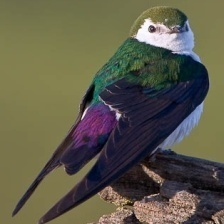

--- 0.24985957145690918 seconds ---
[0.0, 0.0, 7.5045546e-07, 0.0, 0.0, 0.0, 1.9855122e-17, 0.0, 0.9999993, 0.0]
Real 
WHITE BROWED CRAKE
Prediction 
WILSONS BIRD OF PARADISE


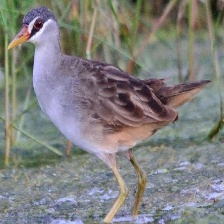

--- 0.2595527172088623 seconds ---
[0.0, 0.0, 3.3569987e-09, 0.0, 0.0, 0.0, 9.725203e-12, 0.0, 1.0, 0.0]
Real 
WILSONS BIRD OF PARADISE
Prediction 
WILSONS BIRD OF PARADISE


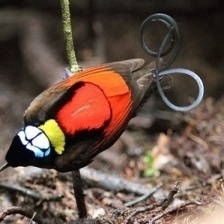

--- 0.2529292106628418 seconds ---
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4419338e-24, 0.0]
Real 
YELLOW HEADED BLACKBIRD
Prediction 
SHOEBILL


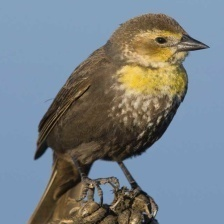

In [9]:
import cv2
import time
import tensorflow as tf
from IPython.display import Image
DATADIR = "/content/drive/MyDrive/birds(test)" 
CATEGORIES = ["RED FODY", "SAND MARTIN", "SHOEBILL", "STEAMER DUCK", "STRIPPED SWALLOW", "TAKAHE", "VIOLET GREEN SWALLOW", "WHITE BROWED CRAKE", "WILSONS BIRD OF PARADISE", "YELLOW HEADED BLACKBIRD"]
def prepare(file):
    IMG_SIZE = 224
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#model = tf.keras.models.load_model("CNN_AlexNet.model")
#image = prepare("/content/test100/1800.jpg") #your image path
#PATH = "/content/drive/MyDrive/birds(test)"

for category in CATEGORIES :
  path = os.path.join(DATADIR, category)
  i = 1 #для предсказания 1 картинки каждого вида птиц
  for img in os.listdir(path):
    if i < 2:
     image = prepare(os.path.join(path, img))
     start_time = time.time()
     prediction = model.predict([image]) 
     prediction = list(prediction[0])
     print("--- %s seconds ---" % (time.time() - start_time))
     print(prediction)
     print("Real ")
     print(category)
     print("Prediction ")
     print(CATEGORIES[prediction.index(max(prediction))])
     display(Image(os.path.join(path, img), width=300, height=300))
     i = i+1 